In [81]:
#빅데이터_분석&시각화 #미니실습,

# 1. 군집합(비지도학습 분석),
# UCI 정제된 데이터, 영국 쇼핑몰, 붓꽃 데이터를 이용했음.
#
# UCI 다른 데이터 셋을 이용해서, 군집합 분석 해보기.
# 군을 나누는 기법, 1) 엘보 기법 2) 실루엣 계수 이용법,
# 2가지 중 1가지 이상 이용해서, 예측 해보기.
# k-means 알고리즘 이용해서, 예측 해보기.
# 모델 만들고, 샘플 값 이용해서, 예측 해보기.

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.font_manager as fm
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
data = pd.read_csv(url)

print(data.head())
print(data.info())
print(data.isnull().sum())
print(data.describe())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [83]:
features = data.drop(columns=['name','status'])

# 데이터 표준화
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 표준화된 데이터플레임 형성
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_data.head())

   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   MDVP:APQ  Shimmer:DDA       NHR       HNR      RPDE       DFA   spread1

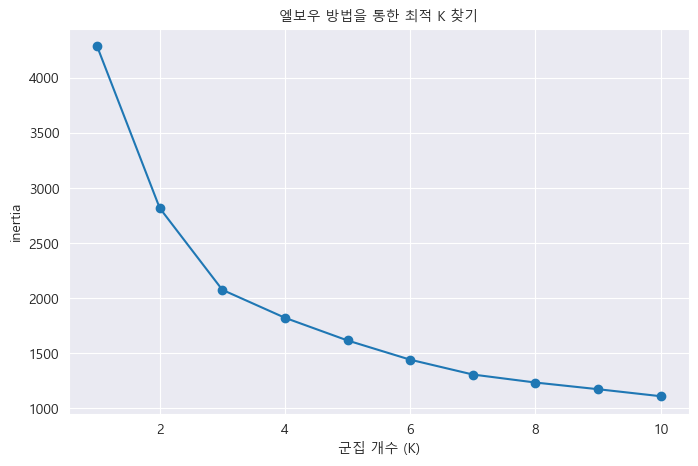

In [84]:
# 최적 군집 수 결정 - 엘보 기법
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 엘보우 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel("군집 개수 (K)", fontproperties=font_prop)
plt.ylabel("inertia")
plt.title("엘보우 방법을 통한 최적 K 찾기", fontproperties= font_prop)
plt.show()

k=1일 때 생성된 클러스터 개수: 1
k=2일 때 생성된 클러스터 개수: 2
k=3일 때 생성된 클러스터 개수: 3
k=4일 때 생성된 클러스터 개수: 4
k=5일 때 생성된 클러스터 개수: 5
k=6일 때 생성된 클러스터 개수: 6
k=7일 때 생성된 클러스터 개수: 7
k=8일 때 생성된 클러스터 개수: 8
k=9일 때 생성된 클러스터 개수: 9
k=10일 때 생성된 클러스터 개수: 10


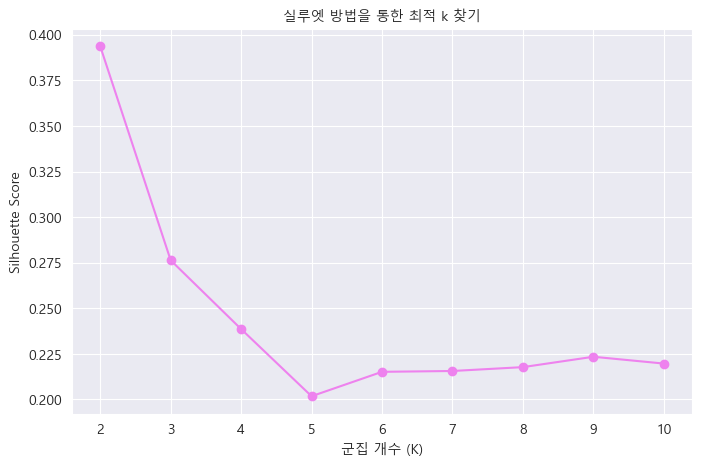

In [85]:
# 실루엣 계수 계산
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)

    unique_clusters = np.unique(cluster_labels)
    print(f"k={k}일 때 생성된 클러스터 개수: {len(unique_clusters)}")  # 추가된 출력문

    if len(unique_clusters) > 1:  # 최소 2개 이상의 군집이 있어야 함
        score = silhouette_score(scaled_data, cluster_labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(None)  # 군집이 하나만 있을 경우 예외 처리

# 폰트 경로 설정
# font_path = "C:/Windows/Fonts/NanumGothic.ttf"
font_path= "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 폰트 경로
font_prop = fm.FontProperties(fname=font_path)

# Matplotlib 기본 폰트 설정
plt.rc('font', family=font_prop.get_name())

# 음수 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

# 실루엣 계수 그래프 시각화
plt.figure(figsize=(8, 5))
plt.plot(k_range, silhouette_scores, marker='o', color='violet')
plt.xlabel("군집 개수 (K)", fontproperties= font_prop)
plt.ylabel('Silhouette Score')
plt.title('실루엣 방법을 통한 최적 k 찾기', fontproperties= font_prop)
plt.show()


클러스터링 결과 샘플:
   MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0    -0.829300     -0.436165     -0.952037        0.334914          0.749759   
1    -0.770972     -0.530974     -0.057721        0.715418          1.037674   
2    -0.909476     -0.723168     -0.109875        0.884991          1.325589   
3    -0.909622     -0.649092     -0.114229        0.775389          1.325589   
4    -0.925657     -0.606245     -0.130608        1.368893          1.901418   

   MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  ...  \
0  0.132963  0.760800    0.131755      0.745985          0.739536  ...   
1  0.453892  1.276809    0.452684      1.681731          1.768464  ...   
2  0.720770  1.585687    0.721813      1.202693          1.027636  ...   
3  0.578885  1.284076    0.577677      1.340396          1.207698  ...   
4  1.095750  2.047187    1.096793      1.836448          1.552389  ...   

   Shimmer:DDA       NHR       HNR      RPDE       DFA   spr

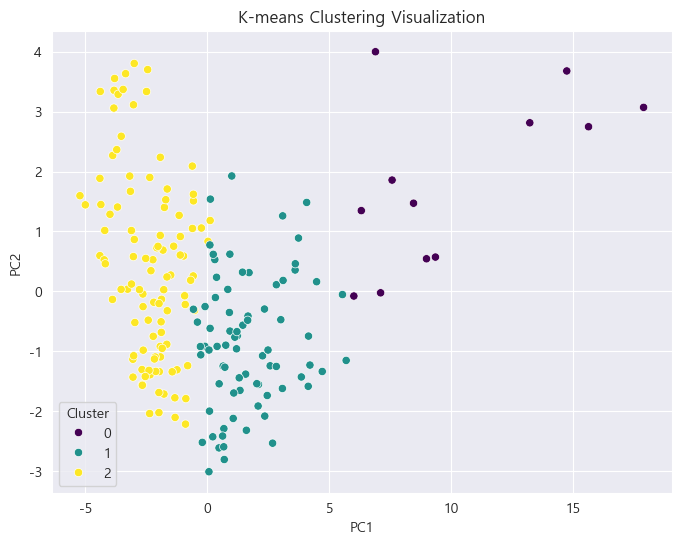

In [86]:
# 최적 k 값 설정 (엘보 기법 및 실루엣 계수를 바탕으로 결정)
optimal_k = 3  # 예제 값, 실제 실행 후 결정 필요

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

# 결과 추가
scaled_data['Cluster'] = cluster_labels
print("\n클러스터링 결과 샘플:")
print(scaled_data.head())

# 클러스터 시각화 (2D PCA 변환 후 시각화 가능)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

df_pca = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', palette='viridis', data=df_pca)
plt.title('K-means Clustering Visualization')
plt.show()

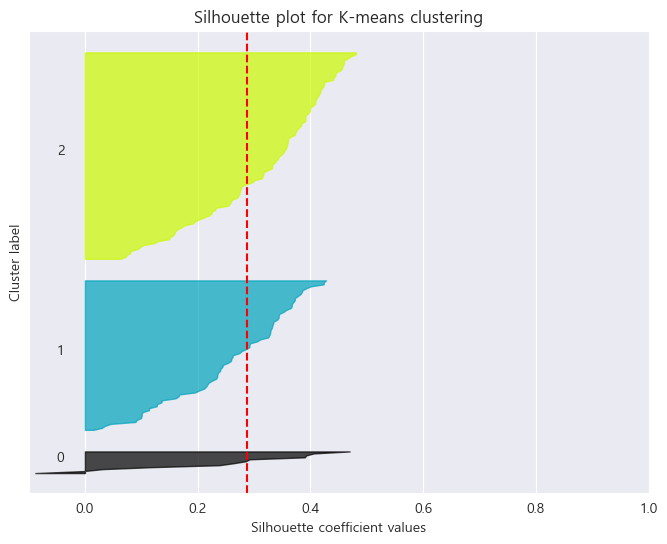

In [87]:
# 실루엣 시각화
fig, ax1 = plt.subplots(figsize=(8, 6))
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(scaled_data) + (optimal_k + 1) * 10])

silhouette_values = silhouette_samples(scaled_data, cluster_labels)
y_lower = 10

for i in range(optimal_k):
    ith_cluster_silhouette_values = silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i) / optimal_k)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for K-means clustering")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")
ax1.axvline(x=silhouette_score(scaled_data, cluster_labels), color="red", linestyle="--")
ax1.set_yticks([])
plt.show()

In [88]:
# 🌱 예측을 위한 샘플 데이터 생성 (22개의 특성을 사용)
sample_data = pd.DataFrame(
    [
        [0.1, -0.2, 0.5, -1.0, 0.7, -0.3, 0.9, 1.1, -0.4, 0.2, 0.4, -0.1, 0.5, -0.2, 0.6, 0.2, -0.1, -0.5, 0.3, 1.2, -0.7, 0.8],  # 예제 샘플 1
        [0.3, 0.0, 0.7, -0.9, 0.6, -0.2, 0.8, 1.0, -0.3, 0.3, 0.5, -0.2, 0.6, -0.1, 0.5, 0.1, -0.2, -0.4, 0.4, 1.3, -0.6, 0.7],  # 예제 샘플 2
        [0.2, -0.1, 0.6, -1.2, 0.5, -0.3, 0.7, 1.2, -0.5, 0.1, 0.4, -0.3, 0.5, -0.2, 0.4, 0.3, -0.1, -0.6, 0.2, 1.1, -0.8, 0.6]   # 예제 샘플 3
    ],
    columns=features.columns
)

# 📌 스케일링 적용 (훈련 데이터와 같은 방식으로 변환)
scaled_sample_data = scaler.transform(sample_data)

# 🔄 `scaled_sample_data`를 DataFrame으로 변환하여 열 이름을 유지
scaled_sample_data_df = pd.DataFrame(scaled_sample_data, columns=features.columns)

# 🎯 예측 수행
sample_predictions = kmeans.predict(scaled_sample_data_df)

# 🔍 결과 출력
for i, pred in enumerate(sample_predictions):
    print(f"샘플 {i+1}: 예측된 군집 = Cluster {pred}")

샘플 1: 예측된 군집 = Cluster 0
샘플 2: 예측된 군집 = Cluster 0
샘플 3: 예측된 군집 = Cluster 0
